In [ ]:
!pip install transformers sentencepiece

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
review_files = [
    "reviews_0-250_masked.csv",
    "reviews_250-500_masked.csv",
    "reviews_500-750_masked.csv",
    "reviews_750-1250_masked.csv",
    "reviews_1250-end_masked.csv"
]

In [ ]:
df_reviews = pd.concat((pd.read_csv(f"/content/{file}") for file in review_files), ignore_index=True)

In [ ]:
df_reviews.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
rating,0
is_recommended,57232
helpfulness,154322
total_feedback_count,0
total_neg_feedback_count,0
total_pos_feedback_count,0
submission_time,0
review_text,345


In [ ]:
df_reviews.shape

(285412, 19)

In [ ]:
df_reviews = df_reviews.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'helpfulness', 'review_title'])

In [ ]:
# first 5 rows
df_reviews.head()

,rating,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,5,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,0.0,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5,1.0,0,0,0,2023-03-21,My review title says it all! I get so excited ...,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,5,1.0,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,5,1.0,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
df_reviews.isna().sum()

,0
rating,0
is_recommended,57232
total_feedback_count,0
total_neg_feedback_count,0
total_pos_feedback_count,0
submission_time,0
review_text,345
skin_tone,55226
eye_color,67746
skin_type,36874


In [ ]:
for col in ['eye_color', 'hair_color', 'skin_tone', 'skin_type', 'is_recommended']:
    df_reviews[col] = df_reviews[col].fillna("Unknown")


In [ ]:
df_reviews.isna().sum()

,0
rating,0
is_recommended,0
total_feedback_count,0
total_neg_feedback_count,0
total_pos_feedback_count,0
submission_time,0
review_text,0
skin_tone,0
eye_color,0
skin_type,0


In [ ]:
df_reviews = df_reviews.dropna(subset=['review_text'])

In [ ]:
from transformers import pipeline

# Load the summarization model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
# Join a sample of 5 reviews
sample_reviews = df_reviews['review_text'].sample(5, random_state=42).tolist()
text_block = " ".join(sample_reviews)

# Optional: Truncate text to fit the model's max token limit (1024 tokens ≈ ~1200-1500 words)
text_block = text_block[:2000]

# Summarize
summary = summarizer(text_block, max_length=150, min_length=30, do_sample=False)

# Showing the summary
print(summary[0]['summary_text'])


The Estée Lauder advanced night repair eye concentrate is pretty good. It feels light and goes on smooth. I love that my skin feels hydrated and soft immediately. It is a perfect add to my skincare. No scent and no residue.


In [ ]:
df_reviews['product_name'].dropna().unique()[:10]

array(['Gentle Hydra-Gel Face Cleanser',
       'Lip Sleeping Mask Intense Hydration with Vitamin C',
       'Soy Hydrating Gentle Face Cleanser',
       'Ultra Repair Cream Intense Hydration',
       'Superfood Antioxidant Cleanser',
       'Mini Superfood Antioxidant Cleanser', 'Pure Skin Face Cleanser',
       'Clear Improvement Active Charcoal Mask to Clear Pores',
       'Jet Lag Mask', 'Mini Jet Lag Mask'], dtype=object)

In [ ]:
# product name
product = "Gentle Hydra-Gel Face Cleanser"

# Filter reviews
product_reviews = df_reviews[df_reviews['product_name'] == product]['review_text'].dropna()

# Combine into one text block
text_block = " ".join(product_reviews.tolist())[:2000]


In [ ]:
summary = summarizer(text_block, max_length=150, min_length=30, do_sample=False)
print(f"\nSummary for '{product}':\n")
print(summary[0]['summary_text'])


Your max_length is set to 150, but your input_length is only 121. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=60)



Summary for 'Gentle Hydra-Gel Face Cleanser':

Nudestix “Citrus Clean Balm & Make-Up Melt’ has completely changed my skin (for the better) The make-up melt is oil based and removes all of your makeup super easily. I follow-up with this water based cleanser, and I also use this just by itself when I’m not wearing make up.


In [ ]:
# Group by brand, summarize each
for brand in df_reviews['brand_name'].dropna().unique()[:5]:  # limit to top 5 brands
    brand_reviews = df_reviews[df_reviews['brand_name'] == brand]['review_text'].dropna()
    text_block = " ".join(brand_reviews.tolist())[:2000]

    if text_block:
        summary = summarizer(text_block, max_length=150, min_length=30, do_sample=False)
        print(f"\n Brand: {brand}")
        print(summary[0]['summary_text'])



🧴 Brand: NUDESTIX
Nudestix “Citrus Clean Balm & Make-up Melt’ has completely changed my skin (for the better) The make-up melt is oil based and removes all of your makeup super easily. It leaves the skin gently cleansed, but without stripping the skin. I received this product for free from bzzagent to try.

🧴 Brand: LANEIGE
Lip mask helps to keep my lips from becoming too chapped. The scent isn't my favourite but it works great! I put it on every night before I go to sleep and every morning I wake up with smooth, moisturizer and soft. If you have dry cracked lips, this is a must have.

🧴 Brand: fresh
Best facial cleanser I have used! I heard great reviews about it, hesitating to get it so long because of the price. Very gentle and clean feeling, doesn’t strip moisture or exfoliate. Bottle lasts a long time.

🧴 Brand: First Aid Beauty
This is the worst moisturizer I have used. It irritates my skin to the point of red patches and flakes, it pills under makeup. On its own — with no other

In [ ]:
from textblob import TextBlob

# Add sentiment score
df_reviews['sentiment_score'] = df_reviews['review_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df_reviews['sentiment_label'] = df_reviews['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.1 else 'negative' if x < -0.1 else 'neutral'
)


In [ ]:
df_reviews.head()

,rating,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,sentiment_score,sentiment_label
0,5,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Unknown,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,0.283333,positive
1,1,0.0,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Unknown,Unknown,Unknown,Unknown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,0.000000,neutral
2,5,1.0,0,0,0,2023-03-21,My review title says it all! I get so excited ...,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,0.102778,positive
3,5,1.0,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Unknown,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,0.381250,positive
4,5,1.0,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",light,hazel,combination,Unknown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,-0.127381,negative


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


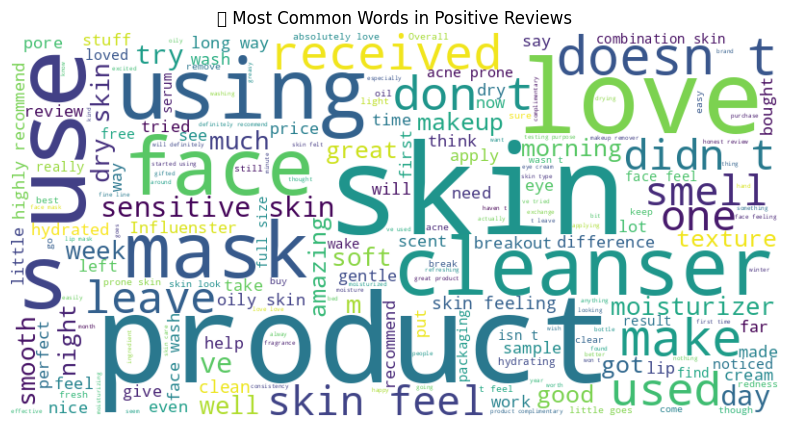

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(df_reviews[df_reviews['sentiment_label'] == 'positive']['review_text'].dropna().tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Positive Reviews")
plt.show()


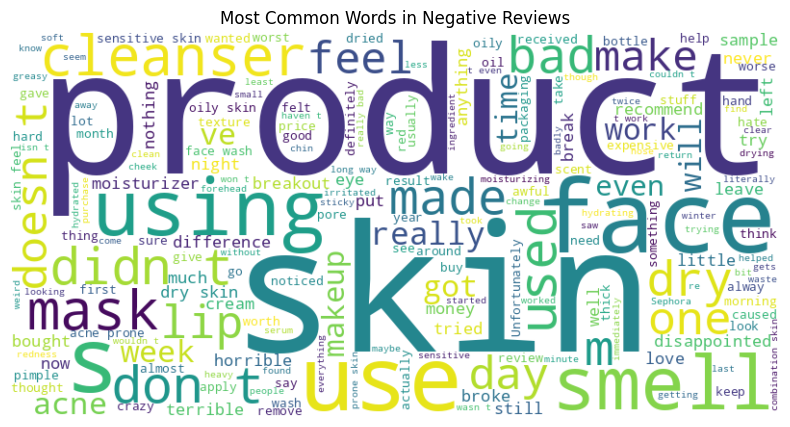

In [ ]:
negative_text = " ".join(df_reviews[df_reviews['sentiment_label'] == 'negative']['review_text'].dropna().tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Negative Reviews")
plt.show()


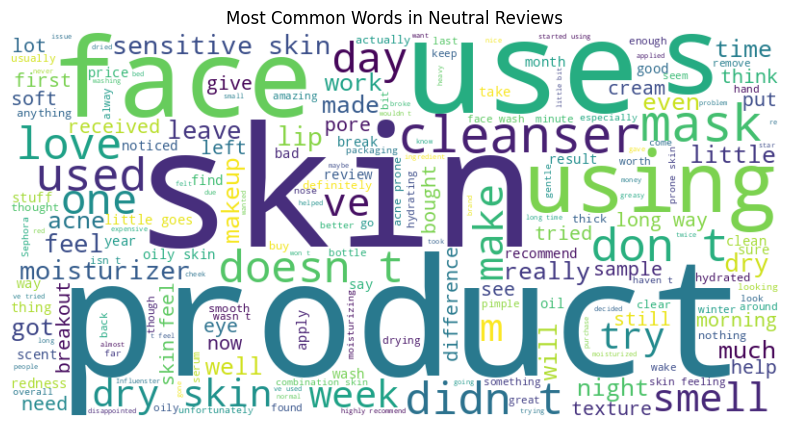

In [ ]:
neutral_text = " ".join(df_reviews[df_reviews['sentiment_label'] == 'neutral']['review_text'].dropna().tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Neutral Reviews")
plt.show()

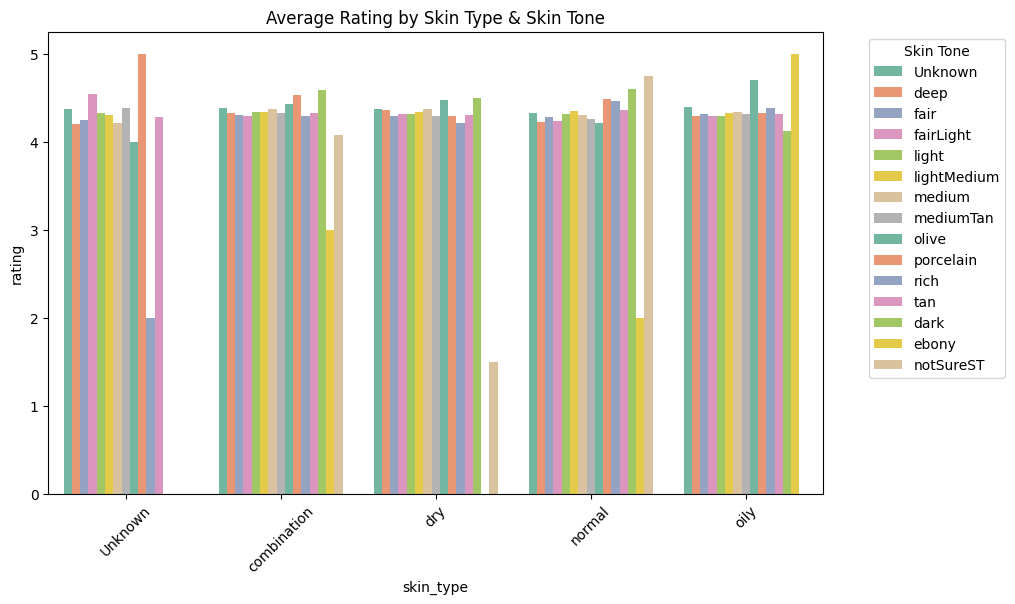

In [ ]:
# Group by both and get average rating
import matplotlib.pyplot as plt
import seaborn as sns
combined = df_reviews.groupby(['skin_type', 'skin_tone'])['rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=combined, x='skin_type', y='rating', hue='skin_tone', palette='Set2')
plt.xticks(rotation=45)
plt.title('Average Rating by Skin Type & Skin Tone')
plt.legend(title='Skin Tone', bbox_to_anchor=(1.05, 1))
plt.show()


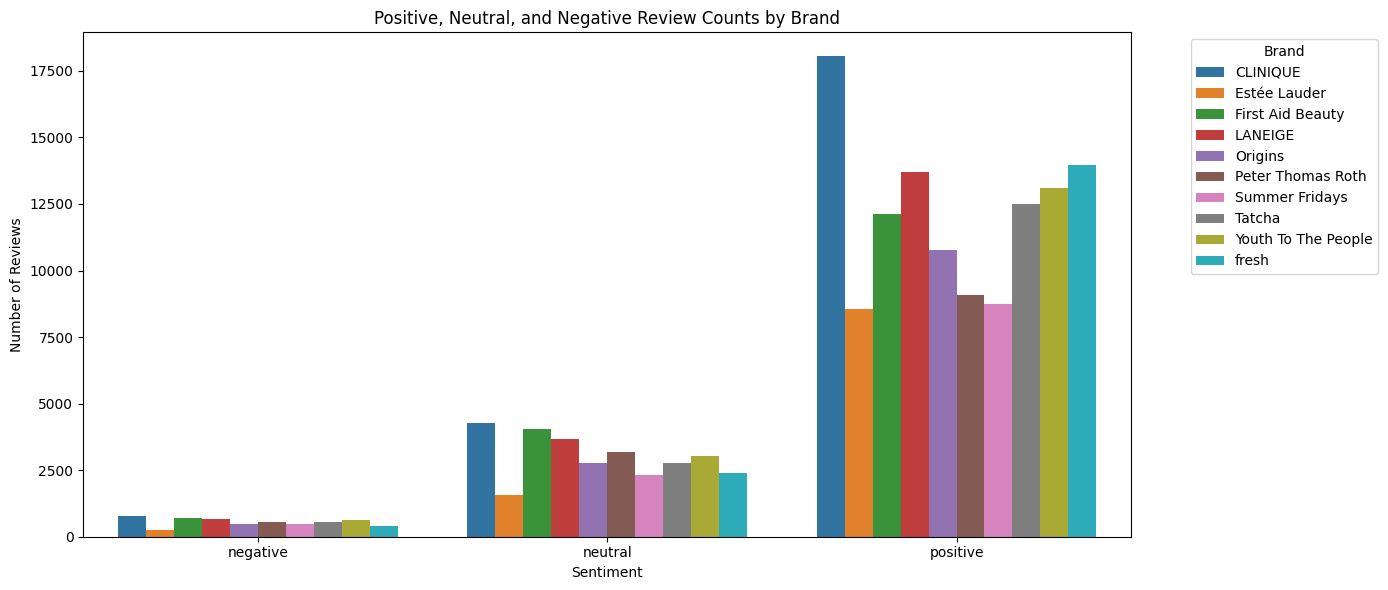

In [ ]:
# Group by brand and sentiment only (optionally skin_type later)
sentiment_counts = (
    df_top.groupby(['brand_name', 'sentiment_label'])
    .size()
    .reset_index(name='review_count')
)

plt.figure(figsize=(14,6))
sns.barplot(
    data=sentiment_counts,
    x='sentiment_label',   # Positive, Neutral, Negative
    y='review_count',
    hue='brand_name',      # Different color for each brand
    palette='tab10'
)

plt.title('Positive, Neutral, and Negative Review Counts by Brand')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



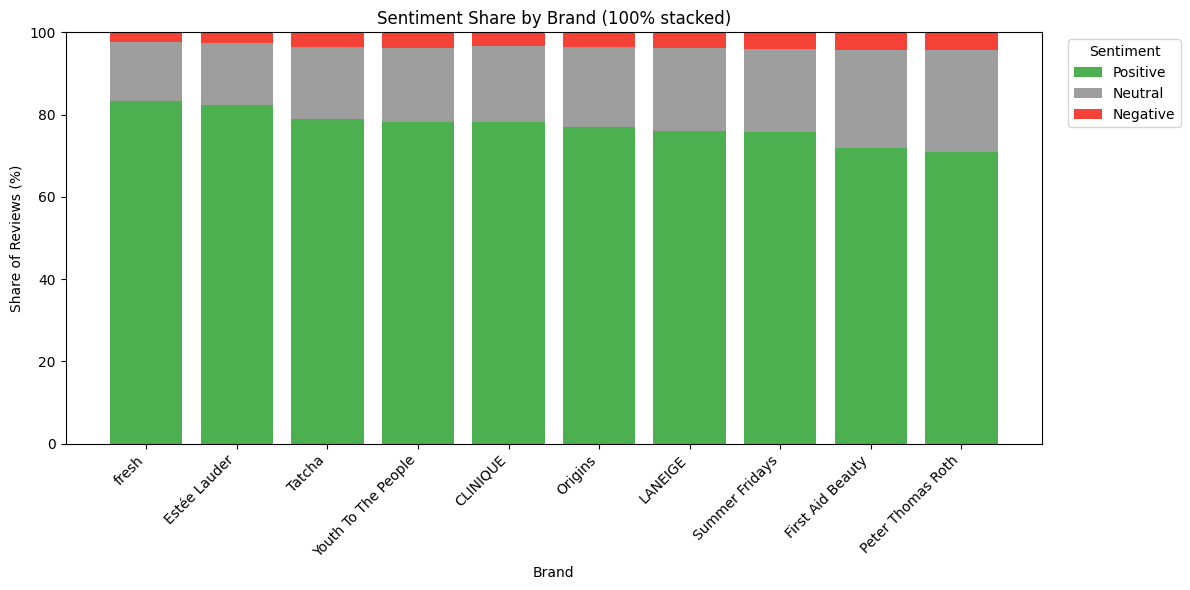

In [ ]:

# 1) pick the set of brands to show (top 10 by review count)
top_n = 10
top_brands = df_reviews['brand_name'].value_counts().head(top_n).index
df_top = df_reviews[df_reviews['brand_name'].isin(top_brands)].copy()

# 2) make sure sentiment labels are consistent
df_top['sentiment_label'] = df_top['sentiment_label'].str.lower().map({
    'positive':'positive','neutral':'neutral','negative':'negative'
})

# 3) counts -> percentages per brand
counts = (
    df_top.groupby(['brand_name','sentiment_label'])
          .size()
          .unstack(fill_value=0)[['positive','neutral','negative']]  # fixed order
)

percent = counts.div(counts.sum(axis=1), axis=0) * 100

# optional: sort brands by % positive (descending)
order = percent['positive'].sort_values(ascending=False).index
percent = percent.loc[order]

# 4) plot 100% stacked bars
fig, ax = plt.subplots(figsize=(12,6))
bottom = pd.Series([0]*len(percent), index=percent.index)

colors = {'positive':'#4CAF50', 'neutral':'#9E9E9E', 'negative':'#F44336'}

for col in ['positive','neutral','negative']:
    ax.bar(percent.index, percent[col], bottom=bottom, label=col.capitalize(), color=colors[col])
    bottom += percent[col]

ax.set_ylabel('Share of Reviews (%)')
ax.set_xlabel('Brand')
ax.set_ylim(0, 100)
ax.set_title('Sentiment Share by Brand (100% stacked)')
ax.legend(title='Sentiment', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
